In [137]:
class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

In [138]:
def makeP(): # an easy test case used in early development
    P = []
    P.append(Point(-0.4, -0.8))
    P.append(Point(-0.1, -0.7))
    P.append(Point( 0.2, -0.3))
    P.append(Point( 0.5,  0.2))
    P.append(Point( 0.5,  0.4))
    P.append(Point( 0.1,  0.7))
    P.append(Point(-0.1,  0.5))
    P.append(Point(-0.3,  0.3))
    P.append(Point(-0.4,  0.2))
    P.append(Point(-0.4, -0.3))
    return P

P = makeP()

In [139]:
import matplotlib.pyplot
from  matplotlib.pyplot import *

In [140]:
def poly_draw(Poly, wait = False, *args, **kwargs):
    """plots a polygon (if enclosed within a figure()...show() clause)"""
    if len(Poly) == 0: return
    if len(Poly) == 1: scatter(Poly[0], 12, 'r')
    else:
        x = [p.x for p in Poly]
        x.append(x[0])
        y = [p.y for p in Poly]
        y.append(y[0])   
        plot(x, y, *args, **kwargs)


In [141]:
def poly_print(Poly):
    if len(Poly) == 0: return
    for j in range(len(Poly)):
        p = Poly[j]
        s = '('+"{:4.2}".format(p.x)+','+"{:4.2}".format(p.y)+') '
        print(s,  end = '')
        if j % 8 == 7: print() # newline
    print()

In [142]:
def x_clip(Poly, x):
    """returns either an empty list or an ordered pair [y1, y2] (with y1 <= y2) representing the 
    restriction of the polygon to the line X = x"""
    
    Lx = [Poly[j].x for j in range(len(Poly))]
    
    xmin = min(Lx)
    if  x < xmin: return []
    if x == xmin:
        y0 = [Poly[j].y for j in range(len(Poly)) if Poly[j].x == xmin]
        return [min(y0), max(y0)]

    xmax = max(Lx)
    if x > xmax: return []
    if x == xmax:
        y1 = [Poly[j].y for j in range(len(Poly)) if Poly[j].x == xmax]
        return [min(y1), max(y1)]
     
    # xmin < x < xmax:
    outlist = [p.y for p in Poly if p.x == x]
    
    j = 0
    while len(outlist) < 2 and j < len(Poly):
        p = Poly[j]
        q = Poly[(j+1) % len(Poly)]
        if p.x < x < q.x or q.x < x < p.x:
            t = (x - p.x) / (q.x - p.x)
            outlist.append( (1-t) * p.y + t * q.y)
        j += 1
            
    outlist.sort()
    return outlist

In [143]:
import math

sign = lambda x: math.copysign(1, x) 

def line_pq(p, q):
    return [p.y - q.y, -p.x + q.x, p.x * q.y - p.y * q.x]   

def image(L, p):
    return L[0] * p.x + L[1] * p.y + L[2]

def intersection_x(p, q, r, s):
    Lpq = line_pq(p, q)
    Lrs = line_pq(r, s)
    ratpq = image(Lpq, r)
    satpq = image(Lpq, s)
    patrs = image(Lrs, p)
    qatrs = image(Lrs, q)
    if sign(patrs) == sign(qatrs) or sign(ratpq) == sign(satpq):
        return []
    else: return [(Lpq[2]*Lrs[1] - Lpq[1]*Lrs[2]) / (Lpq[0]*Lrs[1] - Lpq[1]*Lrs[0])]
    

In [144]:

def same1(p, q):
    ABS_TOL = 1.0e-6
    return abs(p - q) < ABS_TOL

def vet1(old):
    lol = len(old)
    if lol < 2: return old
    nu = []
    j = 0
    prev = None
    while j < lol:
        latest = old[j]
        if prev == None or not same1(latest, prev):
            nu.append(latest)
            prev = latest
        j += 1
    if len(nu) > 1 and same1(nu[0], nu[-1]): nu.pop()
    return nu

      

In [145]:
def create_x_sig(P, Q):
    x_sig = []
    for a in P: x_sig.append(a.x)
    for b in Q: x_sig.append(b.x)
    
    if len(P) > 1 and len(Q) > 1:
        for j in range(len(P)):
            P1 = P[j]
            P2 = P[(j+1) % len(P)]
            for k in range(len(Q)):
                Q1 = Q[k]
                Q2 = Q[(k+1) % len(Q)]
                x_sig.extend(intersection_x(P1, P2, Q1, Q2))
    x_sig.sort()
    return vet1(x_sig)
            

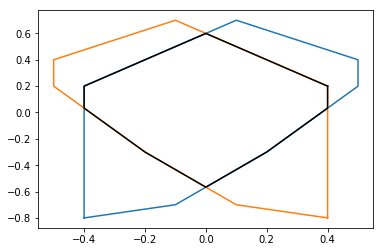

In [146]:
def reflect_Y(Pin): return [Point(-p.x, p.y) for p in Pin]


import collections

def check_poly(Poly):
    pass

def convex_polygon_intersection(P, Q):
    check_poly(P)
    check_poly(Q)
    x_sig = create_x_sig(P, Q)
    outpoly = collections.deque([])
    for x in x_sig: 
        a = x_clip(P, x)
        b = x_clip(Q, x)
        if not ( a == [] or b == [] or a[0] > b[1] or a[1] < b[0]):
            lo = max(a[0],b[0])
            hi = min(a[1],b[1])
            if lo == hi:
                outpoly.append(Point(x, lo))
            else:
                outpoly.append(Point(x, lo))
                outpoly.appendleft(Point(x, hi))
    return list(outpoly)

P = makeP()
Q = reflect_Y(P)

figure()
poly_draw(P)
poly_draw(Q)
PQ = convex_polygon_intersection(P, Q)
poly_draw(PQ, color = 'k')
show()